In [1]:
%matplotlib inline
import numpy as np
import numpy.linalg as la

import matplotlib.pyplot as plt
import matplotlib

In [2]:
matplotlib.rcParams.update({'font.size': 14})

Given the function $f(x) = \sin(10x)$ let's approximate $f'$ and $f''$ at many points in the domain. 

In [3]:
def foo(x):
    return np.sin(10*x)
def d_foo(x):
    return 10*np.cos(10*x)
def d2_foo(x):
    return -100*np.sin(10*x)

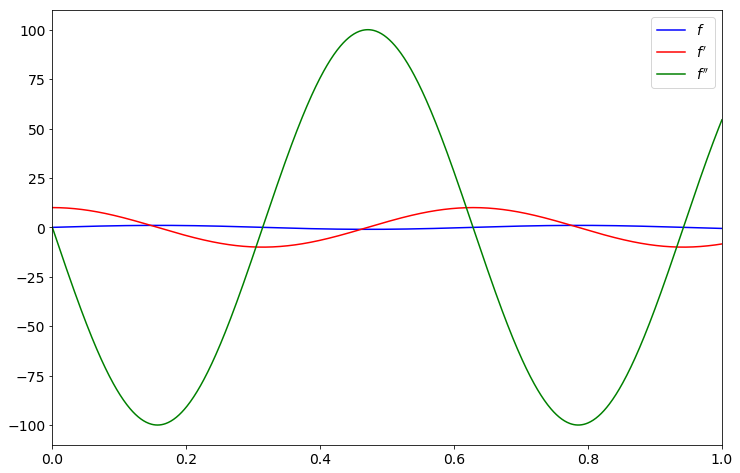

In [4]:
plt.figure(figsize=(12,8))
zs = np.linspace(0,1,1000)
plt.plot(zs, foo(zs), 'b-')
plt.plot(zs, d_foo(zs), 'r-')
plt.plot(zs, d2_foo(zs), 'g-')

#plt.ylim((-1.1,1.1))
plt.xlim((0,1))
#plt.title()
plt.legend(["$f$", "$f'$", "$f''$"])
plt.show()

In [5]:
def rbf(r, eps=1):
    return np.exp(-(eps*r)**2)
def d_rbf_div_r(r, eps=1):
    return -2*eps**2*np.exp(-(eps*r)**2)
def d2_rbf(r, eps=1):
    return 2*eps**2*(2*eps**2*r**2 - 1)*np.exp(-eps**2*r**2)

cond(A) = 9.58388e+16
First derivative error: 	4.77191e-05


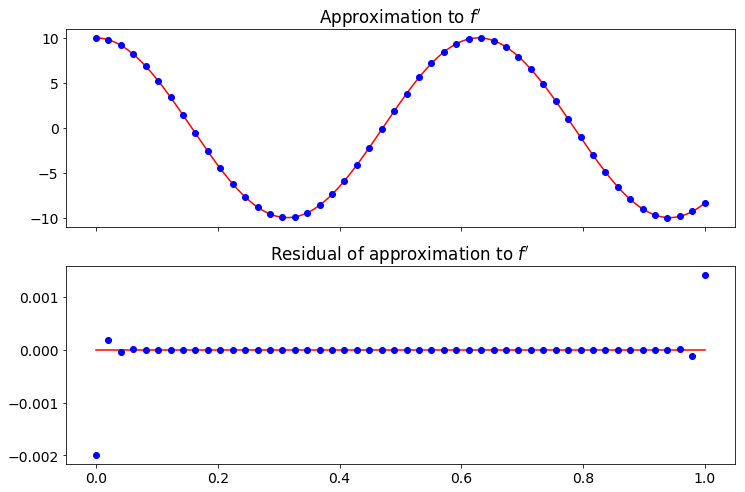

Second derivative error: 	0.00146646


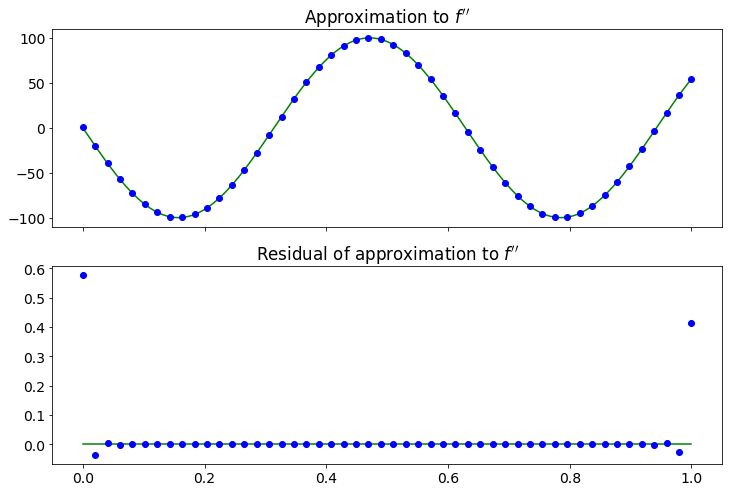

In [6]:
N = 50
epsilon = 11

xs = np.linspace(0,1, N)
zs = np.linspace(0,1, 10**3)

# approximate first derivative
xs_outer = np.subtract.outer(xs,xs)
A = rbf(np.abs(xs_outer), epsilon)
print('cond(A) = %g' % la.cond(A))
Lphis = d_rbf_div_r(np.abs(xs_outer), epsilon) * -xs_outer
W = la.solve(A, Lphis).T

d_approx = W@foo(xs)
print('First derivative error: \t%g' % (la.norm(d_approx-d_foo(xs))/la.norm(d_foo(xs))) )

fig, axs = plt.subplots(2, sharex=True, figsize=(12,8))
axs[0].plot(zs, d_foo(zs), 'r-')
axs[0].plot(xs, d_approx, 'bo')
axs[0].set_title('Approximation to $f^\prime$')

axs[1].plot(zs, [0]*len(zs), 'r-')
axs[1].plot(xs, d_approx-d_foo(xs), 'bo')
axs[1].set_title('Residual of approximation to $f^\prime$')
plt.show()

Lphis = d2_rbf(np.abs(xs_outer), epsilon)
W = la.solve(A, Lphis).T

d2_approx = W@foo(xs)
print('Second derivative error: \t%g' % (la.norm(d2_approx-d2_foo(xs))/la.norm(d2_foo(xs))) )

fig, axs = plt.subplots(2, sharex=True, figsize=(12,8))
axs[0].plot(zs, d2_foo(zs), 'g-')
axs[0].plot(xs, d2_approx, 'bo')
axs[0].set_title('Approximation to $f^{\prime\prime}$')

axs[1].plot(zs, [0]*len(zs), 'g-')
axs[1].plot(xs, d2_approx-d2_foo(xs), 'bo')
axs[1].set_title('Residual of approximation to $f^{\prime\prime}$')
plt.show()

Asside from the Runge phenomenon at the boundaries, the RBF-FD approximation is quite accurate. If we restrict our comparision to the interior points we see that the accuracy is much higher.

First derivative error: 	4.51307e-06


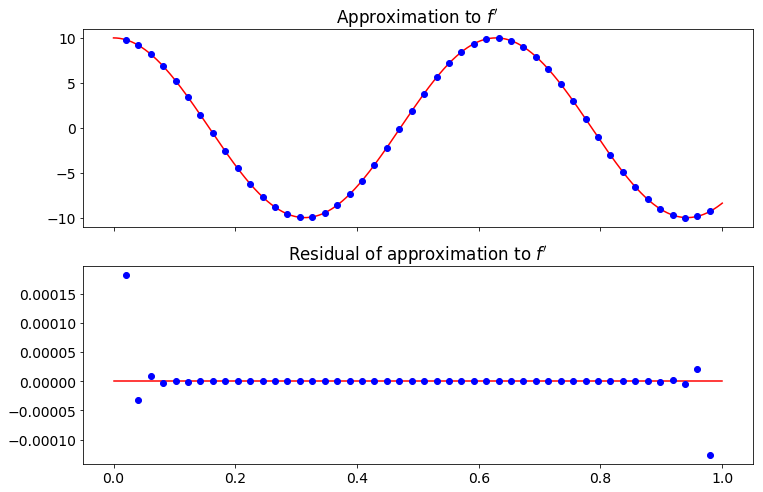

Second derivative error: 	9.05684e-05


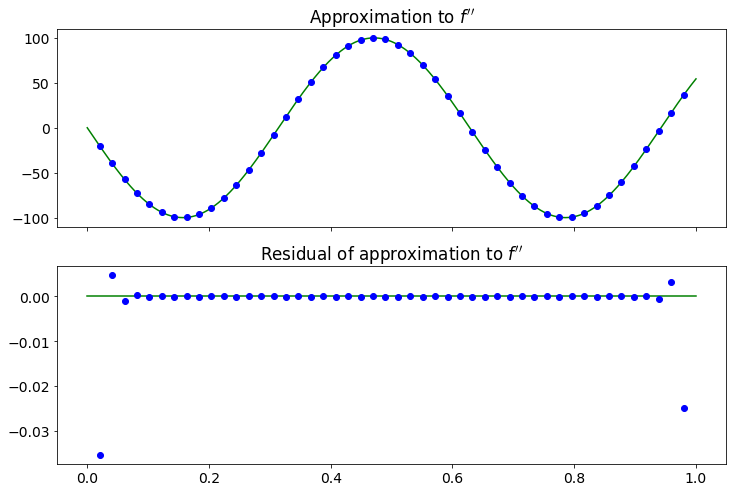

In [7]:
print('First derivative error: \t%g' % (la.norm(d_approx[1:-1]-d_foo(xs[1:-1]))/la.norm(d_foo(xs[1:-1]))) )
fig, axs = plt.subplots(2, sharex=True, figsize=(12,8))
axs[0].plot(zs, d_foo(zs), 'r-')
axs[0].plot(xs[1:-1], d_approx[1:-1], 'bo')
axs[0].set_title('Approximation to $f^\prime$')

axs[1].plot(zs, [0]*len(zs), 'r-')
axs[1].plot(xs[1:-1], d_approx[1:-1]-d_foo(xs[1:-1]), 'bo')
axs[1].set_title('Residual of approximation to $f^\prime$')
plt.show()

print('Second derivative error: \t%g' % (la.norm(d2_approx[1:-1]-d2_foo(xs[1:-1]))/la.norm(d2_foo(xs[1:-1]))) )
fig, axs = plt.subplots(2, sharex=True, figsize=(12,8))
axs[0].plot(zs, d2_foo(zs), 'g-')
axs[0].plot(xs[1:-1], d2_approx[1:-1], 'bo')
axs[0].set_title('Approximation to $f^{\prime\prime}$')

axs[1].plot(zs, [0]*len(zs), 'g-')
axs[1].plot(xs[1:-1], d2_approx[1:-1]-d2_foo(xs[1:-1]), 'bo')
axs[1].set_title('Residual of approximation to $f^{\prime\prime}$')
plt.show()

Comparing only the inner $n-4$ points, we get even higher accuracy.

First derivative error: 	8.3809e-07


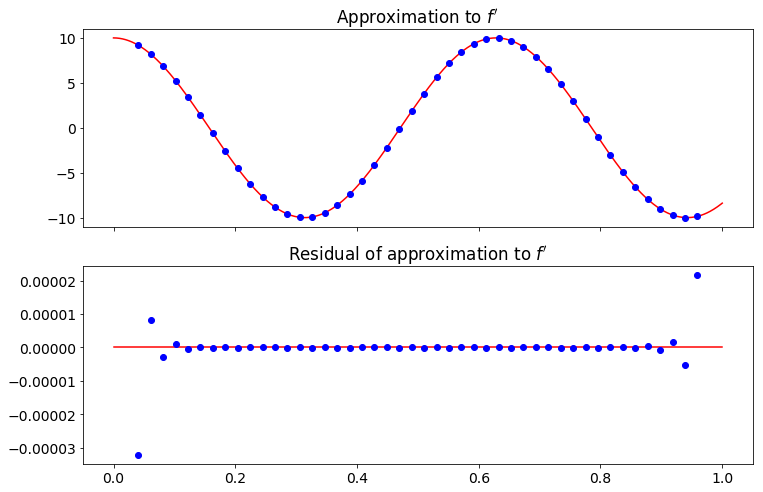

Second derivative error: 	1.23342e-05


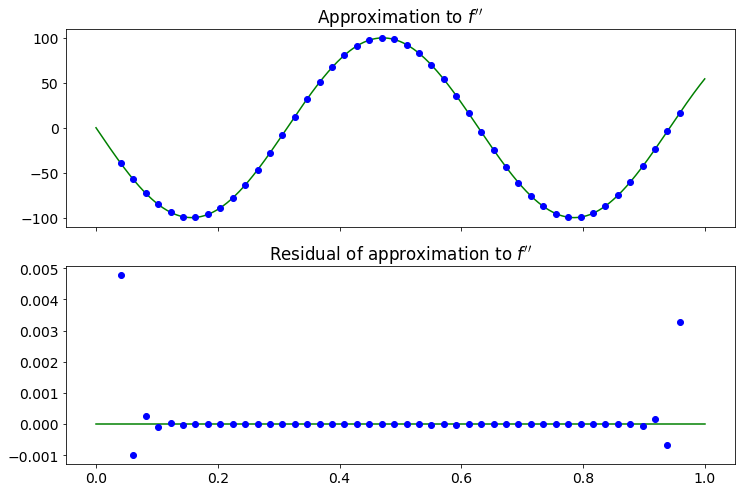

In [8]:
print('First derivative error: \t%g' % (la.norm(d_approx[2:-2]-d_foo(xs[2:-2]))/la.norm(d_foo(xs[2:-2]))) )
fig, axs = plt.subplots(2, sharex=True, figsize=(12,8))
axs[0].plot(zs, d_foo(zs), 'r-')
axs[0].plot(xs[2:-2], d_approx[2:-2], 'bo')
axs[0].set_title('Approximation to $f^\prime$')

axs[1].plot(zs, [0]*len(zs), 'r-')
axs[1].plot(xs[2:-2], d_approx[2:-2]-d_foo(xs[2:-2]), 'bo')
axs[1].set_title('Residual of approximation to $f^\prime$')
plt.show()

print('Second derivative error: \t%g' % (la.norm(d2_approx[2:-2]-d2_foo(xs[2:-2]))/la.norm(d2_foo(xs[2:-2]))) )
fig, axs = plt.subplots(2, sharex=True, figsize=(12,8))
axs[0].plot(zs, d2_foo(zs), 'g-')
axs[0].plot(xs[2:-2], d2_approx[2:-2], 'bo')
axs[0].set_title('Approximation to $f^{\prime\prime}$')

axs[1].plot(zs, [0]*len(zs), 'g-')
axs[1].plot(xs[2:-2], d2_approx[2:-2]-d2_foo(xs[2:-2]), 'bo')
axs[1].set_title('Residual of approximation to $f^{\prime\prime}$')
plt.show()

Another solution to avoid Runge phenomenon is to choose the Chebyshev points instead of equispaced points.

cond(A) = 5.31356e+17
First derivative error: 	3.39189e-07


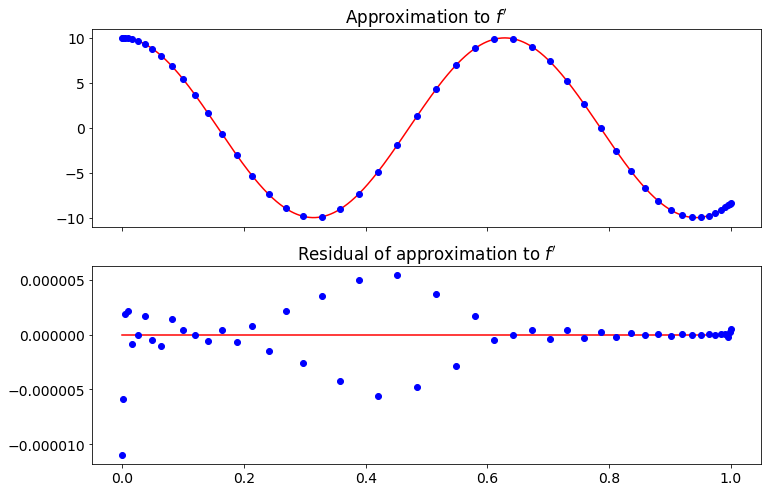

Second derivative error: 	1.69926e-05


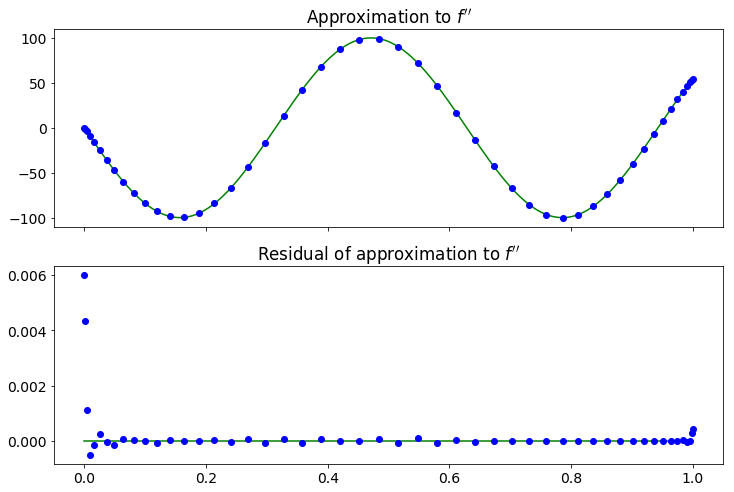

In [9]:
N = 50
epsilon = 10

xs = np.linspace(0,np.pi, N)
xs = (np.cos(xs)+1)/2
xs.sort()
zs = np.linspace(0,1, 10**3)

# approximate first derivative
xs_outer = np.subtract.outer(xs,xs)
A = rbf(np.abs(xs_outer), epsilon)
print('cond(A) = %g' % la.cond(A))
Lphis = d_rbf_div_r(np.abs(xs_outer), epsilon) * -xs_outer
W = la.solve(A, Lphis).T

d_approx = W@foo(xs)
print('First derivative error: \t%g' % (la.norm(d_approx-d_foo(xs))/la.norm(d_foo(xs))) )

fig, axs = plt.subplots(2, sharex=True, figsize=(12,8))
axs[0].plot(zs, d_foo(zs), 'r-')
axs[0].plot(xs, d_approx, 'bo')
axs[0].set_title('Approximation to $f^\prime$')

axs[1].plot(zs, [0]*len(zs), 'r-')
axs[1].plot(xs, d_approx-d_foo(xs), 'bo')
axs[1].set_title('Residual of approximation to $f^\prime$')
plt.show()

Lphis = d2_rbf(np.abs(xs_outer), epsilon)
W = la.solve(A, Lphis).T

d2_approx = W@foo(xs)
print('Second derivative error: \t%g' % (la.norm(d2_approx-d2_foo(xs))/la.norm(d2_foo(xs))) )

fig, axs = plt.subplots(2, sharex=True, figsize=(12,8))
axs[0].plot(zs, d2_foo(zs), 'g-')
axs[0].plot(xs, d2_approx, 'bo')
axs[0].set_title('Approximation to $f^{\prime\prime}$')

axs[1].plot(zs, [0]*len(zs), 'g-')
axs[1].plot(xs, d2_approx-d2_foo(xs), 'bo')
axs[1].set_title('Residual of approximation to $f^{\prime\prime}$')
plt.show()